# Notebook setup

This notebook is intended to be used online on the Einstein Toolkit tutorial server, offline as a read-only document. To make all of these work some setting need to be tweaked, which we do in the next cell.

In [1]:
# this allows you to use "cd" in cells to change directories instead of requiring "%cd"
%automagic on
# override IPython's default %%bash to not buffer all output
from IPython.core.magic import register_cell_magic
@register_cell_magic
def bash(line, cell): get_ipython().system(cell)

# this (non-default package) keeps the end of shell output in view
try: import scrolldown
except ModuleNotFoundError: pass

# We are going to install kuibit, a Python package to post-process Cactus simulations.
# We will install kuibit inside the Cactus directory. The main reason for this is to
# have a make easier to uninstall kuibit (you can just remove the Cactus folder). 
import os, sys
os.environ["PYTHONUSERBASE"] = os.environ['HOME'] + "/Cactus/python"
sys.path.insert(1, f"{os.environ['PYTHONUSERBASE']}/lib/python{sys.version_info[0]}.{sys.version_info[1]}/site-packages")


Automagic is ON, % prefix IS NOT needed for line magics.


# Running a basic configuration

The configuration i want to run is the evolution of a TOV star in a cartesian grid in the einstein toolkit environment. This work is taken from my thesis, so let's access the configuration files.
First I'll show where my configuration files are

In [2]:
%%bash
cd ~/programmi/tov_ET/recon_method/
ls | grep .par

tov_ET_eno.par
tov_ET_ppm.par
tov_ET_tvd.par
tov_ET_weno.par


And now i show where my Cactus path is

In [2]:
cd ~/ET/Cactus

/home/sam/ET/Cactus


Now let's run a simple simulation for the weno reconstruction method.
I usually prefer to have my simulations folder inside the ET folder, to do that you need to edit the `basedir` value in `simfactory/etc/defs.local.ini`

``` 
[swift]
basedir = ~/ET/simulations
```

For my case i also decided to move the Cactus directory in another path, if you do so you have to tell the ET that your `sourcebasedir` has changed.
Just go to `/home/sam/ET/Cactus/simfactory/mdb/machines` and look for your machine hostname .ini file and then change the following line, in my case `swift.ini`

```
sourcebasedir   = /home/sam/ET
```

In [11]:
%%bash
./simfactory/bin/sim create tov_ET_weno --configuration sim --parfile=~/programmi/tov_ET/recon_method/tov_ET_weno.par

Parameter file: /home/sam/programmi/tov_ET/recon_method/tov_ET_weno.par
Skeleton Created
Job directory: "/home/sam/ET/simulations/tov_ET_weno"
Executable: "/home/sam/ET/Cactus/exe/cactus_sim"
Option list: "/home/sam/ET/simulations/tov_ET_weno/SIMFACTORY/cfg/OptionList"
Submit script: "/home/sam/ET/simulations/tov_ET_weno/SIMFACTORY/run/SubmitScript"
Run script: "/home/sam/ET/simulations/tov_ET_weno/SIMFACTORY/run/RunScript"
Parameter file: "/home/sam/ET/simulations/tov_ET_weno/SIMFACTORY/par/tov_ET_weno.par"


As you can see, the structure of the simulation has been created, that mean ET has allocated the resources and activated the thorns needed in order to run the simulation. One can check the structure of this by going in the directory

In [2]:
%%bash
cd ~/ET/simulations/tov_ET_weno/
ls

log.txt
output-0000
output-0000-active
SIMFACTORY


And finally now, we can start the simulation. Remember to install the packae `openmpi-bin`

In [13]:
%%bash
# start simulation segment
./simfactory/bin/sim submit tov_ET_weno --cores=2 --num-threads=1 --walltime=0:20:00

Assigned restart id: 0 
Executing submit command: exec nohup /home/sam/ET/simulations/tov_ET_weno/output-0000/SIMFACTORY/SubmitScript < /dev/null > /home/sam/ET/simulations/tov_ET_weno/output-0000/tov_ET_weno.out 2> /home/sam/ET/simulations/tov_ET_weno/output-0000/tov_ET_weno.err & echo $!
Submit finished, job id is 730293


The `submit` command submitted a new segment for the simulation `tov_ET_weno` to the queueing system to run in the background asking for a maximum runtime of 20 minutes, using a total of 2 compute cores and using 1 thread per MPI ranks. On your laptop it will start right away, on a cluster the queuing system will wait until a sufficient number of nodes is able to start your simulation.

You can check the status of the simulation with the following command

In [5]:
%%bash
# watch log output, following along as new output is produced
./simfactory/bin/sim show-output --follow tov_ET_weno

Simulation name: tov_ET_weno
==> tov_ET_weno.out <==
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.266578E-07    1.18927
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.266590E-07    1.18926
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.266590E-07    1.18926
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.266590E-07    1.18926
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.266927E-07    1.18888
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.266927E-07    1.18888
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.266927E-07    1.18888
   269312   263.

WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.270250E-07    1.18563
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.270742E-07    1.18520
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.270742E-07    1.18520
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.270742E-07    1.18520
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.270760E-07    1.18519
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.270760E-07    1.18519
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.270760E-07    1.18519
WARNING[L2,P0] (GRHydro):                                      Infini

WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.274102E-07    1.18250
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.274704E-07    1.18204
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.274704E-07    1.18204
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.274704E-07    1.18204
   271360   265.000 |  806.9186817 |    0.0013251
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.274704E-07    1.18204
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.274704E-07    1.18204
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.274704E-07    1.18204
WARNING[L2,P0] (GRH

WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.280751E-07    1.17768
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.280751E-07    1.17768
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.280751E-07    1.17768
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.281472E-07    1.17718
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.281472E-07    1.17718
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.281472E-07    1.17718
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.281473E-07    1.17718
WARNING[L2,P0] (GRHydro):                                      Infini

WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.288460E-07    1.17221
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.288460E-07    1.17221
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.288468E-07    1.17221
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.288468E-07    1.17221
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.288468E-07    1.17221
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.289287E-07    1.17166
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.289287E-07    1.17166
WARNING[L2,P0] (GRHydro):                                      Infini

WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.296144E-07    1.16720
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.297030E-07    1.16664
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.297030E-07    1.16664
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.297030E-07    1.16664
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.297037E-07    1.16664
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.297037E-07    1.16664
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.297037E-07    1.16664
WARNING[L2,P0] (GRHydro):                                      Infini

WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.305370E-07    1.16149
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.305370E-07    1.16149
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.305370E-07    1.16149
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.306330E-07    1.16091
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.306330E-07    1.16091
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.306330E-07    1.16091
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.306338E-07    1.16091
WARNING[L2,P0] (GRHydro):                                      Infini

WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.314336E-07    1.15623
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.315368E-07    1.15564
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.315368E-07    1.15564
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.315368E-07    1.15564
   277504   271.000 |  803.7074196 |    0.0013245
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.315368E-07    1.15564
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.315368E-07    1.15564
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.315368E-07    1.15564
WARNING[L2,P0] (GRH

WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.325071E-07    1.15030
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.325071E-07    1.15030
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.325071E-07    1.15030
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.326187E-07    1.14971
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.326187E-07    1.14971
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.326187E-07    1.14971
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.326187E-07    1.14970
WARNING[L2,P0] (GRHydro):                                      Infini

WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.336645E-07    1.14434
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.336645E-07    1.14434
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.336654E-07    1.14434
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.336654E-07    1.14434
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.336654E-07    1.14434
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.337856E-07    1.14374
WARNING[L2,P0] (GRHydro):                                      Infinite Lorentz factor reset. rho, w_tmp:    0.337856E-07    1.14374
WARNING[L2,P0] (GRHydro):                                      Infini

Traceback (most recent call last):
  File "/home/sam/ET/Cactus/./simfactory/bin/../lib/sim.py", line 149, in <module>
    main()
  File "/home/sam/ET/Cactus/./simfactory/bin/../lib/sim.py", line 145, in main
    CommandDispatch()
  File "/home/sam/ET/Cactus/./simfactory/bin/../lib/sim.py", line 107, in CommandDispatch
    module.main()
  File "/home/sam/ET/Cactus/repos/simfactory2/lib/sim-manage.py", line 398, in main
    CommandDispatch()
  File "/home/sam/ET/Cactus/repos/simfactory2/lib/sim-manage.py", line 377, in CommandDispatch
    exec("command_%s()" % command)
  File "<string>", line 1, in <module>
  File "/home/sam/ET/Cactus/repos/simfactory2/lib/sim-manage.py", line 312, in command_show_output
    restart.show_output()
  File "/home/sam/ET/Cactus/repos/simfactory2/lib/simrestart.py", line 1558, in show_output
    time.sleep(60)
KeyboardInterrupt


Process is interrupted.


To abort the simulation just run

In [ ]:
%%bash
./simfactory/bin/sim stop tov_ET_weno

To list all simulations kept in the cache

In [3]:
%%bash
./simfactory/bin/sim list-simulations

   tov_ET_weno             [ACTIVE (FINISHED), restart 0000, job id 730293]


The output will be stored in a directory, to get its position

In [4]:
%%bash
./simfactory/bin/sim get-output-dir tov_ET_weno

/home/sam/ET/simulations/tov_ET_weno/output-0000


If you're done with your simulation just execute

In [10]:
%%bash
./simfactory/bin/sim purge tov_ET_weno

Simulation name: tov_ET_weno
Simulation tov_ET_weno has been moved to trash folder /home/sam/ET/simulations/TRASH/simulation-tov_ET_weno-swift-swift-sam-2023.03.01-22.25.19-729866


# Plotting the results

We care to plot the results of the central density evolution with respect to time to show the oscillating behaviour of the perturbed star.
I'm gonna sort all reconstruction methods in a single folder named `recon_method`, so i also group the simulations in that folder.

In [11]:
%%bash
mkdir /home/sam/ET/simulations/recon_method/
mv /home/sam/ET/simulations/tov_ET_weno/ /home/sam/ET/simulations/recon_method/tov_ET_weno/
cd /home/sam/ET/simulations/recon_method/
ls

tov_ET_weno


In [26]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt

# plot options
rc = {"text.usetex": True,
      "font.family": "serif",
      "font.sans-serif": ["Computer Modern"],
      #"axes.prop_cycle": plt.cycler(color=["#E24A33", "#348ABD", "#988ED5", "#777777", "#FBC15E", "#8EBA42", "#FFB5B8", "#A2C8EC", "#FFBC79", "#CFCFCF"])
     }
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [27]:
#directory paths
outdir = [
  '/home/sam/ET/simulations/recon_method/tov_ET_tvd/output-0000','/home/sam/ET/simulations/resolution/tov_ET_2/output-0000', #tov_ET_2 already is ppm
  '/home/sam/ET/simulations/recon_method/tov_ET_eno/output-0000','/home/sam/ET/simulations/recon_method/tov_ET_weno/output-0000',
  ]

parname = [
  'tov_ET_tvd','tov_ET_res2_xmax24', #tov_ET_2 already is ppm
  'tov_ET_eno','tov_ET_weno', 
]

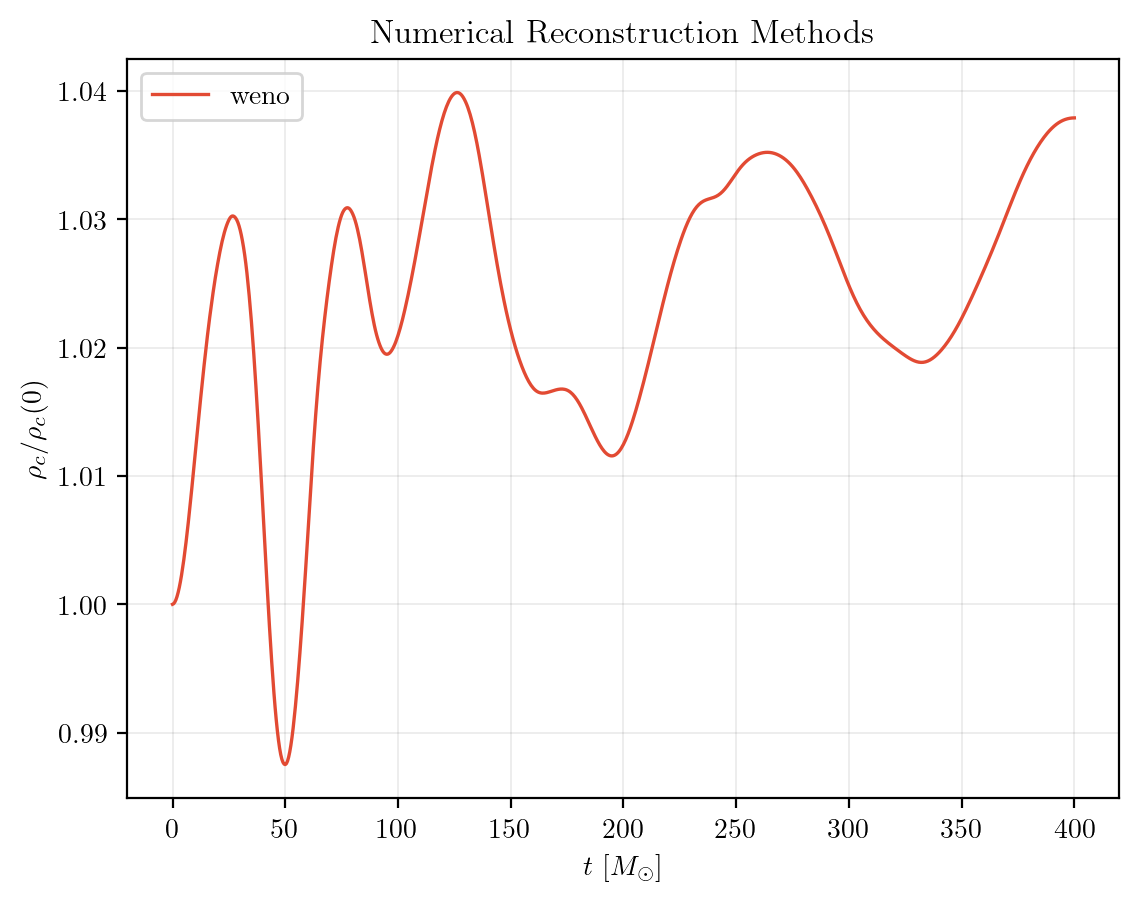

In [28]:
#plotting
method = ['tvd', 'ppm', 'eno', 'weno'] #id

i = 3     #selector

lin_data = np.genfromtxt(outdir[i] + "/" + parname[i] + "/hydrobase-rho.maximum.asc")
plt.plot(lin_data[:,1],lin_data[:,2]/lin_data[0,2], label= f"{method[i]}",  linewidth=1.2)


#plot options
plt.title("Numerical Reconstruction Methods")
plt.xlabel(r'$t$ [$M_{\odot}$]')
plt.ylabel(r'$\rho_c / \rho_c(0)$')
plt.grid(c = 'black', linewidth =.05)
plt.legend()
# plt.savefig('/home/sam/Programmi/tov_ET/recon_method/recon' + '.png', dpi = 600)
plt.show()

This is how one starts a simple simulation and is able to plot its results.